In [113]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

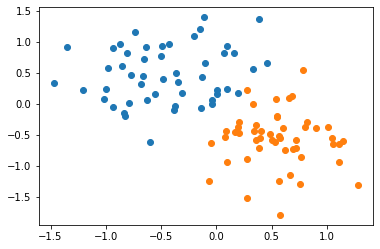

In [114]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
X = torch.Tensor(X)
y = torch.Tensor(y)
def scatter_plot():
    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])
    plt.show()
scatter_plot()

In [115]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self,x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [116]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters())) # w1=0.1622,w2=-0.1683,bias=0.1939

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [117]:
'''
[w, b] = model.parameters()
w1, w2 = w.view(2) # 2 is the shape of input
print('weight:',w.view(2))
print('bias:', b.view(1))
'''
#-------------------------
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
    return(w1.item(), w2.item(), b[0].item())

In [118]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = ((w1*x1) +b1)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    plt.show()

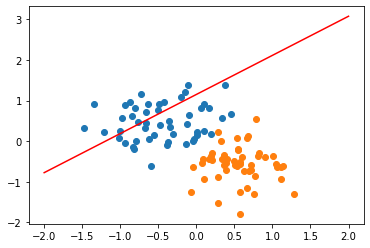

In [119]:
plot_fit('Initial Model')

In [120]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [121]:
epochs = 1000
losses = []
for i in range(epochs): 
    y_pred = model.forward(X)
    loss = criterion(y_pred, y.unsqueeze(1))
    print("epochs:", i, "loss:", loss.item())  
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs: 0 loss: 0.6185115575790405
epochs: 1 loss: 0.6174640655517578
epochs: 2 loss: 0.6164200305938721
epochs: 3 loss: 0.6153795123100281
epochs: 4 loss: 0.6143423318862915
epochs: 5 loss: 0.6133086681365967
epochs: 6 loss: 0.6122784614562988
epochs: 7 loss: 0.6112514734268188
epochs: 8 loss: 0.6102280616760254
epochs: 9 loss: 0.6092079281806946
epochs: 10 loss: 0.6081911325454712
epochs: 11 loss: 0.607177734375
epochs: 12 loss: 0.6061676740646362
epochs: 13 loss: 0.6051609516143799
epochs: 14 loss: 0.604157567024231
epochs: 15 loss: 0.6031573414802551
epochs: 16 loss: 0.6021605730056763
epochs: 17 loss: 0.6011670231819153
epochs: 18 loss: 0.6001767516136169
epochs: 19 loss: 0.5991897583007812
epochs: 20 loss: 0.5982059240341187
epochs: 21 loss: 0.5972253680229187
epochs: 22 loss: 0.5962480306625366
epochs: 23 loss: 0.5952739119529724
epochs: 24 loss: 0.5943029522895813
epochs: 25 loss: 0.5933352112770081
epochs: 26 loss: 0.5923706293106079
epochs: 27 loss: 0.5914091467857361
epochs:

Text(0.5, 0, 'epoch')

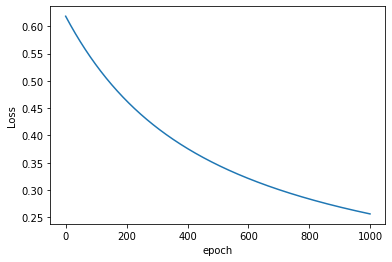

In [122]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

Red point positive probability = 0.9424158334732056
Back point positive probability = 0.05055497586727142
Red point positive probability = 1
Back point positive probability = 0


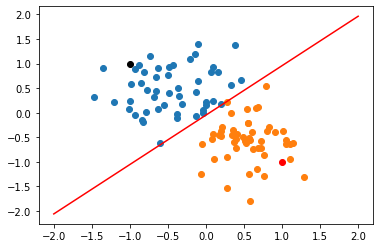

In [127]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Back point positive probability = {}".format(model.forward(point2).item()))
print("Red point positive probability = {}".format(model.predict(point1)))
print("Back point positive probability = {}".format(model.predict(point2)))
plot_fit('Trained Model')